## Import Libraries and load Dataset:-

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# !pip uninstall matplotlib seaborn -y
# # !pip install --upgrade pip setuptools wheel
# !pip install matplotlib==3.7.1 seaborn==0.12.2

## This is amazon product reviews dataset which I have used from Kaggle website:-

In [ ]:
# df = pd.read_csv('models/Reviews.csv')
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df['Text'][2]

'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.'

## Data Preprocessing & Data Cleaning:-

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
df.size,df.shape

(5684540, (568454, 10))

In [ ]:
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


In [ ]:
df.isnull().sum()/df.shape[0]

,0
Id,0.000000
ProductId,0.000000
UserId,0.000000
ProfileName,0.000046
HelpfulnessNumerator,0.000000
HelpfulnessDenominator,0.000000
Score,0.000000
Time,0.000000
Summary,0.000047
Text,0.000000


## Above we see that Summary and ProfileName column have null value but
## ProfileName & Summary feature is not import for Sentiment Analaysis Text so further
## we will remove ProfileName and Summary Columns:-

In [ ]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
df['HelpfulnessNumerator'].value_counts()

,count
HelpfulnessNumerator,
0,303826
1,116467
2,53727
3,29007
4,16963
...,...
109,1
281,1
231,1


In [ ]:
df['HelpfulnessDenominator'].value_counts()

,count
HelpfulnessDenominator,
0,270052
1,112753
2,61482
3,34394
4,22306
...,...
256,1
251,1
195,1


In [ ]:
df['Score'].value_counts()

,count
Score,
5,363122
4,80655
1,52268
3,42640
2,29769


# I think 1,2,3 into Negative and 4,5 into Positive

[Text(0, 0, '52268'), Text(0, 0, '29769'), Text(0, 0, '42640'), Text(0, 0, '80655'), Text(0, 0, '363122')]


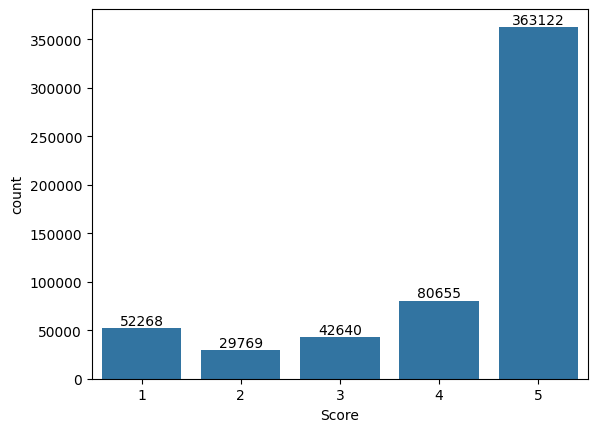

In [ ]:
val = sns.countplot(x=df['Score'])
for i in val.containers:
    print(val.bar_label(i))

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1970-01-01 00:00:01.303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1970-01-01 00:00:01.346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1970-01-01 00:00:01.219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1970-01-01 00:00:01.307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1970-01-01 00:00:01.350777600,Great taffy,Great taffy at a great price. There was a wid...


# check for Score 1 and 2

In [ ]:
df1 = df[df['Score'].isin([1,2])]
df1

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1970-01-01 00:00:01.346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1970-01-01 00:00:01.307923200,Cough Medicine,If you are looking for the secret ingredient i...
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1970-01-01 00:00:01.339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1970-01-01 00:00:01.348099200,poor taste,I love eating them and they are good for watch...
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1970-01-01 00:00:01.332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan..."
...,...,...,...,...,...,...,...,...,...,...
568433,568434,B003XUL27E,A1JUG9WCN1A52Z,maudlin666,0,0,1,1970-01-01 00:00:01.311638400,Tastes horrible!,I just bought this soup today at my local groc...
568434,568435,B003XUL27E,ABGQPE97ZVYJ3,Katherine Kelly,0,0,2,1970-01-01 00:00:01.306368000,Not so good,This soup is mostly broth. Although it has a k...
568435,568436,B003XUL27E,A2PSB4WQHH46HN,carlyowu,0,2,2,1970-01-01 00:00:01.285718400,Where's the tortellini?,"It is mostly broth, with the advertised 3/4 cu..."
568446,568447,B001EO7N10,A2P9W8T7NTLG2Z,Andy,0,0,2,1970-01-01 00:00:01.328918400,Mixed wrong,I had ordered some of these a few months back ...


In [ ]:
df.groupby('ProductId')['Score'].agg({'mean','max','min','count','sum'}).fillna(0)[0:10]

,min,count,mean,sum,max
ProductId,,,,,
0006641040,1,37,4.351351,161,5
141278509X,5,1,5.000000,5,5
2734888454,2,2,3.500000,7,5
2841233731,5,1,5.000000,5,5
7310172001,1,173,4.751445,822,5
7310172101,1,173,4.751445,822,5
7800648702,3,2,4.000000,8,5
9376674501,5,1,5.000000,5,5
B00002N8SM,1,38,1.789474,68,5


In [ ]:
df.groupby(['ProductId','Summary'])['Score'].agg({'mean','max','min','count','sum'}).fillna(0)[0:10]

min  count  \
ProductId  Summary                                                          
0006641040 A Gem of a Book                                       5      1   
           A classic                                             4      2   
           A great way to learn the months                       5      1   
           Can't explain why                                     5      1   
           Charming and childlike                                4      1   
           Chicken Soup with Rice                                4      1   
           Chicken soup with Rice                                5      1   
           Children will find it entertaining and a genera...    4      1   
           Darling!                                              5      1   
           Disappointed                                          3      1   

                                                               mean  sum  max  
ProductId  Summary                                                             
0006641040 A Gem of a Book                                      5.0    5    5  
           A classic                                            4.5    9    5  
           A great way to learn the months                      5.0    5    5  
           Can't explain why                                    5.0    5    5  
           Charming and childlike                               4.0    4    4  
           Chicken Soup with Rice                               4.0    4    4  
           Chicken soup with Rice                               5.0    5    5  
           Children will find it entertaining and a genera...   4.0    4    4  
           Darling!                                             5.0    5    5  
           Disappointed                                         3.0    3    3

In [ ]:
df.groupby(['ProductId','UserId'])['Score'].agg({'mean','max','min','count','sum'}).fillna(0)[0:10]

min  count  mean  sum  max
ProductId  UserId                                    
0006641040 A12HY5OZ2QNK4N    5      1   5.0    5    5
           A1C9K534BCI9GO    4      1   4.0    4    4
           A1DJXZA5V5FFVA    5      1   5.0    5    5
           A1HKYQOFC8ZZCH    1      1   1.0    1    1
           A1IJKK6Q1GTEAY    5      1   5.0    5    5
           A1S3C5OFU508P3    4      1   4.0    4    4
           A1S4A3IQ2MU7V4    4      1   4.0    4    4
           A25ACLV5KPB4W     4      1   4.0    4    4
           A2IW4PEEKO2R0U    4      1   4.0    4    4
           A2ONB6ZA292PA     5      1   5.0    5    5

# find specific product details:-

In [ ]:
df[(df['ProductId'].isin(['7310172101'])) & (df['Score'].isin([1,2,3]))][0:20]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
217410,217411,7310172101,A2WDF9UM0M1VAD,susan m. kaitz,3,6,1,1970-01-01 00:00:01.317859200,Review of Freeze Dried Liver Treats For Dogs,I received all containers previously opened - ...
217411,217412,7310172101,A1EJ7AF4H919CL,sunny,3,7,3,1970-01-01 00:00:01.278374400,Not satisfactory,I bought 21 0z freeze dried liver. Half the co...
217412,217413,7310172101,ANW9G620WDPVE,"Kay M ""kay""",2,7,2,1970-01-01 00:00:01.237334400,"great treat, but too expensive","okay, it's freeze-dried liver cube-lets. my c..."
217413,217414,7310172101,AE9ZBY7WW3LIQ,W. K. Ota,5,13,1,1970-01-01 00:00:01.219363200,Why sbould I get crums?,I selected this company over the other even th...
217414,217415,7310172101,A2QHCF0OYJ2N33,Jackie,0,4,3,1970-01-01 00:00:01.245456000,Overpriced!,Dogs love these things but `I do feel they are...
217416,217417,7310172101,A12OC9ZA779927,"Nancy Watts ""Nan Watts""",1,22,2,1970-01-01 00:00:01.134172800,no shipping charges in December if over $50 on...,Same price as Dr. Foster & Smith.
217420,217421,7310172101,A3D0PV8Y6577NN,D. Gilbert,6,7,3,1970-01-01 00:00:01.307491200,"Size inconsistent, needs water",My dog enjoys these treats in moderation. Bec...
217421,217422,7310172101,A1BMOH6U3TG99J,TTO,3,3,3,1970-01-01 00:00:01.333584000,"Great for travel, but too expensive, too much ...",These are great training treats when you need ...
217456,217457,7310172101,A36VWAW5CGT0QC,c.j.,3,4,3,1970-01-01 00:00:01.309651200,dog treats,This product is very expensive but my dogs lov...
217480,217481,7310172101,ARYMKWDYJM1TG,mom,0,0,3,1970-01-01 00:00:01.340236800,Delicious for the Dog,I must say that my dog and all at the dog park...


# Get the Negative feedback text

In [ ]:
df[df['Id']==217481]['Text']

,Text
217480,I must say that my dog and all at the dog park...


In [ ]:
# df.groupby(['ProductId','UserId'])['Score'].agg({'mean','max','min','count','sum'}).fillna(0)[0:10]
df.shape,df.size

((568454, 10), 5684540)

In [ ]:
new_df = df.iloc[:200001,:]
new_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
new_df.shape

(200001, 10)

[Text(0, 0, '18297'), Text(0, 0, '10575'), Text(0, 0, '15624'), Text(0, 0, '29118'), Text(0, 0, '126387')]


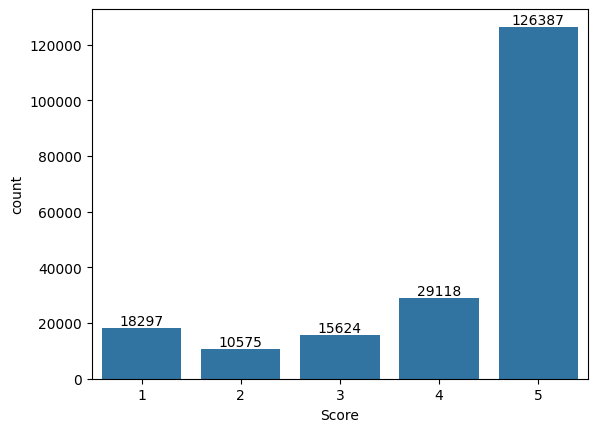

In [ ]:
val = sns.countplot(x=new_df['Score'])
for i in val.containers:
    print(val.bar_label(i))

(array([ 18297.,      0.,  10575.,      0.,      0.,  15624.,      0.,
         29118.,      0., 126387.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

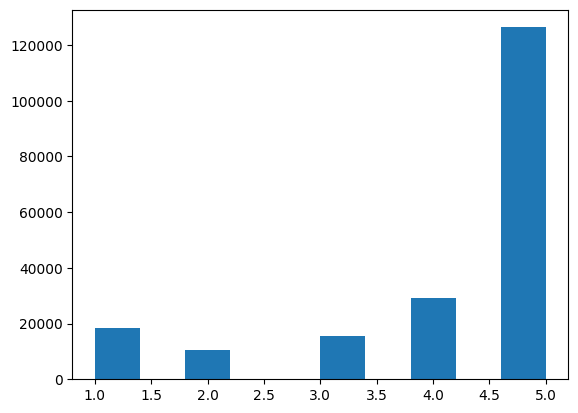

In [ ]:
plt.hist(new_df['Score'])

<ipython-input-27-da34d1bb1a8a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Score'])


<Axes: xlabel='Score', ylabel='Density'>

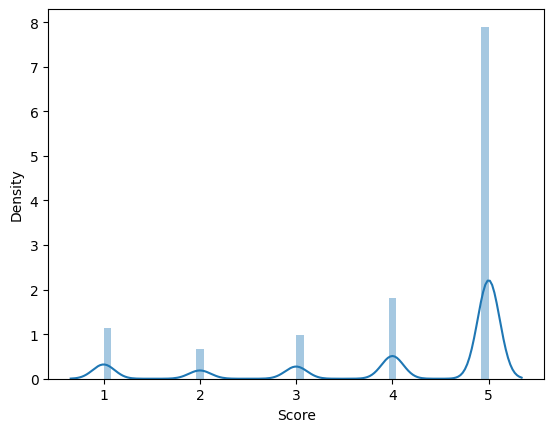

In [ ]:
sns.distplot(new_df['Score'])

<Axes: ylabel='Score'>

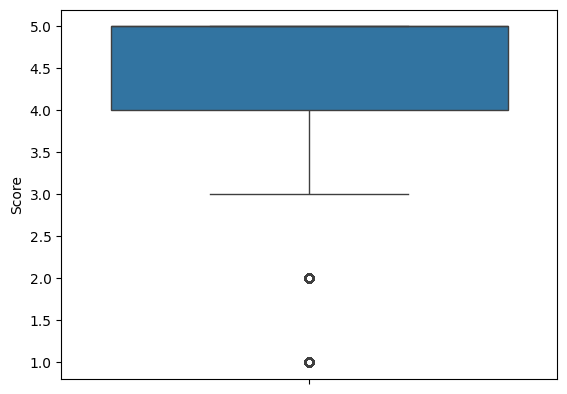

In [ ]:
sns.boxplot(new_df['Score'])

## If we do remove this kind of outlier of value 1 and 2 then model can't capable for predictions new review which have score 1 or 2
## so ignoure its:-

## 1. remove reviews 1 and 2
## 2. 1 , 2 and 3 combined on sama nature ( )

In [ ]:
q1,q3 = new_df['Score'].quantile([0.25,0.75])
q1,q3

IQR = q3 - q1

min_= q1 - 1.5 * IQR
max_= q3 + 1.5 * IQR

min_, max_

new_ = new_df[(new_df['Score']>=min_)  & (new_df['Score']<=max_)]

new_


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
...,...,...,...,...,...,...,...,...,...,...
199992,199993,B000LKYWZI,A1S1AQRVL0H1XO,LaDall,0,0,5,1349827200,Cereal Review,After eating this kind of dry cereal all my li...
199993,199994,B000LKYWZI,A2QVBTJ8VYVXL0,Firelily,0,0,4,1254528000,Grrreat!,"For me cereal is not breakfast food, but snack..."
199994,199995,B000LKYWZI,AG94GZEFAJML9,"Chelsea Davis ""ScoreGreatTickets.com""",0,0,5,1235001600,Cheaper Than Grocery Store,I love this cereal. It tastes good and is REA...
199995,199996,B000LKYWZI,A5Z91P62PT7FR,"Terry E. Oliver ""Char""",0,0,5,1207353600,Delicious!!!,Couldn't find this one in our local grocery. ...


[Text(0, 0, '15624'), Text(0, 0, '29118'), Text(0, 0, '126387')]


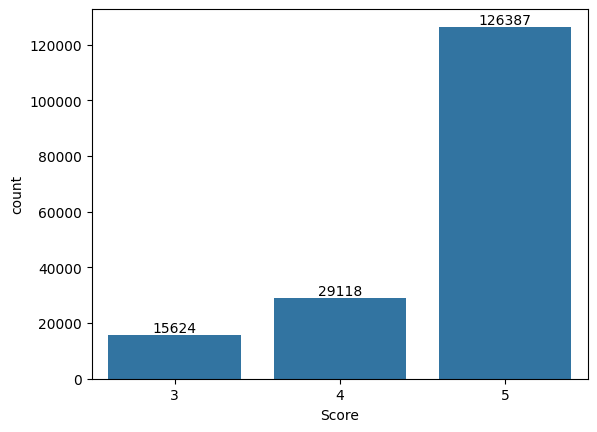

In [ ]:
val = sns.countplot(x=new_['Score'])
for i in val.containers:
    print(val.bar_label(i))

<ipython-input-31-066a2270032e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_['Score'])


<Axes: xlabel='Score', ylabel='Density'>

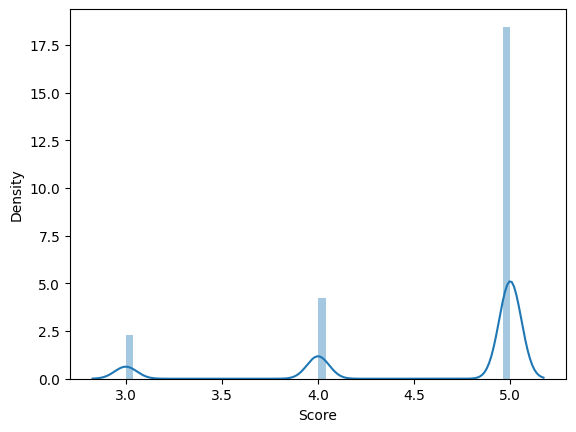

In [ ]:
sns.distplot(new_['Score'])

<Axes: ylabel='Score'>

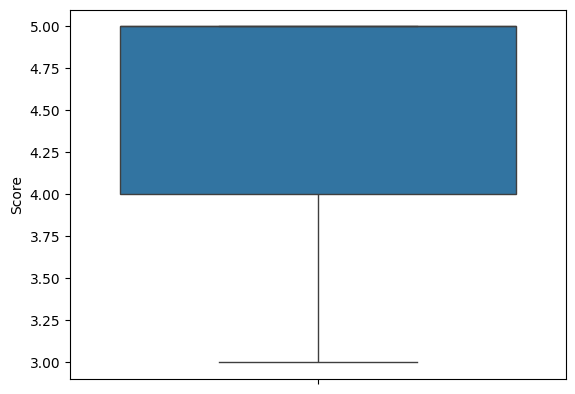

In [ ]:
sns.boxplot(new_['Score'])

(array([ 15624.,      0.,      0.,      0.,      0.,  29118.,      0.,
             0.,      0., 126387.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 10 artists>)

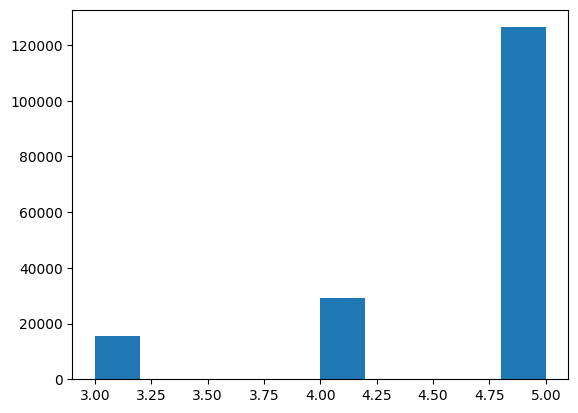

In [ ]:
plt.hist(new_['Score'])

## Feature Engineering & Feature Selections:-

In [ ]:
new_.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
remove_col = ['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary']
new_.drop(remove_col,axis=1,inplace=True)

<ipython-input-6-c5fb9fcd563e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_.drop(remove_col,axis=1,inplace=True)


In [ ]:
new_.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
2,4,This is a confection that has been around a fe...
4,5,Great taffy at a great price. There was a wid...
5,4,I got a wild hair for taffy and ordered this f...
6,5,This saltwater taffy had great flavors and was...


In [ ]:
new_['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [ ]:
new_.isnull().sum()

,0
Score,0
Text,0


In [ ]:
new_['Score'].value_counts()

,count
Score,
5,126387
4,29118
3,15624


In [ ]:
# !pip install textblob

## Import NLP

In [ ]:
# NLP libraries to clean the text data
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
# Function to handle lowercase conversion safely
def to_lower(x):
    if isinstance(x, str):
        return x.lower()
    return x

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# !pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 65.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
token = nlp(new_['Text'][0])

In [ ]:
dir(token)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_bulk_merge',
 '_context',
 '_get_array_attrs',
 '_realloc',
 '_vector',
 '_vector_norm',
 'cats',
 'char_span',
 'copy',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_dict',
 'from_disk',
 'from_docs',
 'from_json',
 'get_extension',
 'get_lca_matrix',
 'has_annotation',
 'has_extension',
 'has_unknown_spaces',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'noun_chunks',
 'noun_chunks_iterator',
 'remove_extension',
 'retokenize',
 'sentiment'

In [ ]:
# Preprocessing function
def preprocess(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Preprocess the text data

In [ ]:
# def preprocess(text):
#     if not isinstance(text, str):
#         return ''
#     # Tokenization
#     tokens = nltk.word_tokenize(text)
#     #tokens = tokens.str.replace('[^\w\s]','')
#     # Remove stop words
#     # stop_words = set(nltk.corpus.stopwords.words('english'))
#     tokens = [word for word in tokens if word not in stop_words]
#     # Stemming
#     stemmer = nltk.PorterStemmer()
#     tokens = [stemmer.stem(word) for word in tokens]
#     return ' '.join(tokens)

In [ ]:
new_['Score'].value_counts().sum()

np.int64(171129)

In [ ]:
new_['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [ ]:
preprocess(new_['Text'][0])

'bought sever vital can dog food product found good qualiti product look like stew process meat smell better labrador finicki appreci product better'

In [ ]:
new_['New_Text'] = new_['Text'].apply(preprocess)

<ipython-input-15-dfb58b450728>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_['New_Text'] = new_['Text'].apply(preprocess)


In [ ]:
new_df.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary'],axis=1,inplace=True)

<ipython-input-16-f45837aa21c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary'],axis=1,inplace=True)


In [ ]:
new_df['New_Text'] = new_df['Text'].apply(preprocess)
new_df

<ipython-input-17-5d416bfa5448>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['New_Text'] = new_df['Text'].apply(preprocess)


,Score,Text,New_Text
0,5,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanutsth peanu...
2,4,This is a confection that has been around a fe...,confect around centuri light pillowi citru gel...
3,2,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...
4,5,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...
...,...,...,...
199996,1,This was the first kind my family and I bought...,first kind famili bought lucki didnt let stop ...
199997,1,I have healthy 45 year old teeth and broke a l...,healthi 45 year old teeth broke larg chuck fro...
199998,2,You might as well eat the box it came in. If ...,might well eat box came werent almond would ta...
199999,5,Let me set the scene for you: three felines in...,let set scene three felin hous purebr rescu re...


In [ ]:
new_df['Score'].value_counts()

,count
Score,
5,126387
4,29118
1,18297
3,15624
2,10575


In [ ]:
new_df[new_df['Score']==3].value_counts().sum()

np.int64(15624)

In [ ]:
new_df['Review'] = new_df['Score'].apply(lambda x: 1 if x >3 else(0 if x ==3 else -1))

<ipython-input-89-f8af0fc01000>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Review'] = new_df['Score'].apply(lambda x: 1 if x >3 else(0 if x ==3 else -1))


In [ ]:
new_df.drop('Review',axis=1,inplace=True)

<ipython-input-88-e544223e8c36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop('Review',axis=1,inplace=True)


In [ ]:
# new_['Original'] = df[['Text']].copy()

In [ ]:
new_.head()

,Score,Text,New_Text
0,5,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...
2,4,This is a confection that has been around a fe...,confect around centuri light pillowi citru gel...
4,5,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...
5,4,I got a wild hair for taffy and ordered this f...,got wild hair taffi order five pound bag taffi...
6,5,This saltwater taffy had great flavors and was...,saltwat taffi great flavor soft chewi candi in...


In [ ]:
new_df.head()

,Score,Text,New_Text,Review
0,5,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...,1
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanutsth peanu...,0
2,4,This is a confection that has been around a fe...,confect around centuri light pillowi citru gel...,1
3,2,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...,0
4,5,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...,1


In [ ]:
new_['Text'][10]

"I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!"

In [ ]:
new_['New_Text'][10]

'dont know cactu tequila uniqu combin ingredi flavour hot sauc make one kind pick bottl trip brought back home us total blown away realiz simpli couldnt find anywher citi bummedbr br magic internet case sauc ecstat itbr br love hot saucei mean realli love hot sauc dont want sauc tastelessli burn throat grab bottl tequila picant gourmet de inclan realiz tast never want use saucebr br thank person incred servic'

In [ ]:
# new_['Review'] = new_['Score'].apply( lambda x:'Positive' if x >=4 else ('Negative' if x<2 else 'Neutral' ))

In [ ]:
# new_['Review'] = new_['Review'].map({'Positive':0,'Neutral':1,'Negative':2})

new_['Review'] = new_['Score'].apply(lambda x: 1 if x >4 else 0)

<ipython-input-19-d693770dd20e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_['Review'] = new_['Score'].apply(lambda x: 1 if x >4 else 0)


In [ ]:
# new_.drop('Review',axis=1,inplace=True)

In [ ]:
new_.head()

,Score,Text,New_Text,Review
0,5,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...,1
2,4,This is a confection that has been around a fe...,confect around centuri light pillowi citru gel...,0
4,5,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...,1
5,4,I got a wild hair for taffy and ordered this f...,got wild hair taffi order five pound bag taffi...,0
6,5,This saltwater taffy had great flavors and was...,saltwat taffi great flavor soft chewi candi in...,1


<Axes: xlabel='Review', ylabel='Score'>

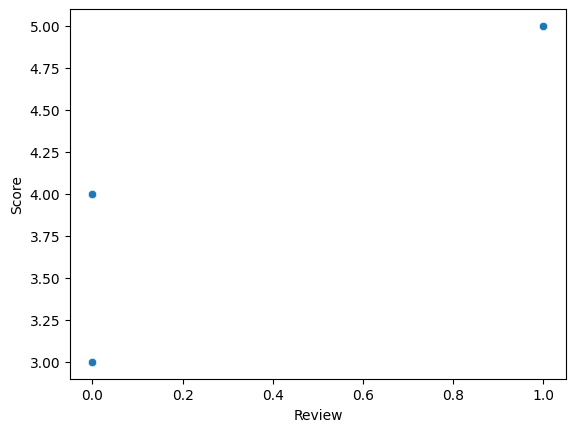

In [ ]:
# sns.scatterplot(x=new_['Score'] ,y= new_['Review'])
sns.scatterplot(x=new_['Review'] ,y= new_['Score'])

<Axes: xlabel='Review', ylabel='Score'>

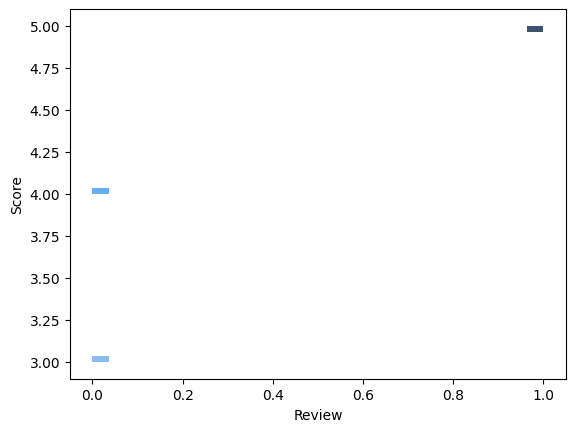

In [ ]:
sns.histplot(x=new_['Review'] ,y= new_['Score'])

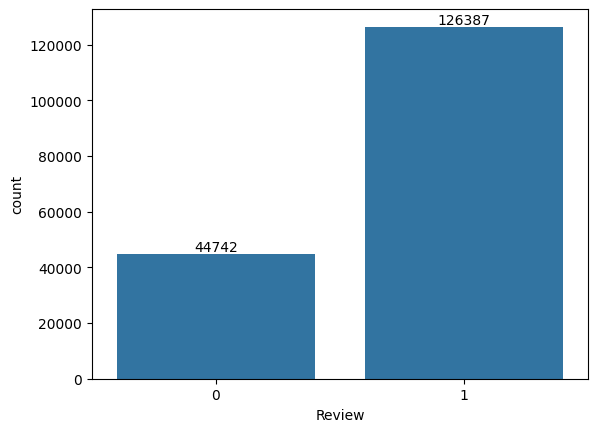

In [ ]:
x = sns.countplot(x=new_['Review'])
for i in x.containers:
    x.bar_label(i)
#sns.countplot(x=new_df['Rating'])

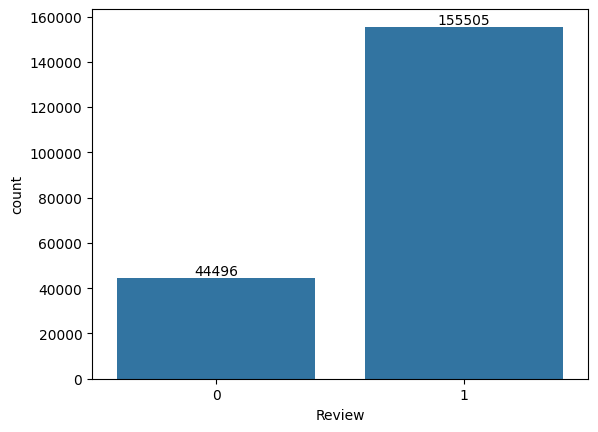

In [ ]:
x = sns.countplot(x=new_df['Review'])
for i in x.containers:
    x.bar_label(i)

In [ ]:
new_.shape

(171129, 4)

In [ ]:
new_df.shape

(200001, 4)

# Hypothesis testing:-

In [ ]:
from textblob import TextBlob
from scipy.stats import ttest_ind
from sklearn.feature_selection import chi2

In [ ]:
# Apply sentiment analysis
new_['polarity'] = new_['New_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
# Apply sentiment analysis
new_df['polarity'] = new_df['New_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

<ipython-input-21-2e9a4073cb20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_['polarity'] = new_['New_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
<ipython-input-21-2e9a4073cb20>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['polarity'] = new_df['New_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [ ]:
new_df['new_review']  = new_df['polarity'].apply(lambda x: 1 if x >0 else( 0 if x==0 else -1))

<ipython-input-22-d527e3b1593f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['new_review']  = new_df['polarity'].apply(lambda x: 1 if x >0 else( 0 if x==0 else -1))


In [ ]:
new_df.head()

,Score,Text,New_Text,polarity,Review,new_review
0,5,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...,0.450000,1,1
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanutsth peanu...,0.083333,-1,1
2,4,This is a confection that has been around a fe...,confect around centuri light pillowi citru gel...,0.387500,1,1
3,2,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...,0.150000,-1,1
4,5,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...,0.458333,1,1


In [ ]:
new_df['Review'].value_counts()

,count
Review,
1,155505
-1,28872
0,15624


In [ ]:
new_df['new_review'].value_counts()

,count
new_review,
1,169158
-1,20686
0,10157


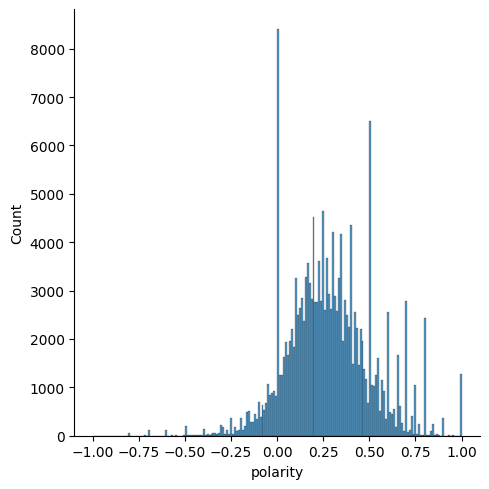

In [ ]:
sns.displot(new_['polarity'])

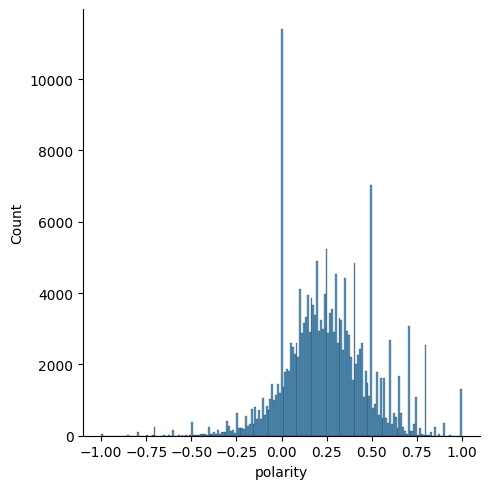

In [ ]:
sns.displot(new_df['polarity'])

<Axes: ylabel='polarity'>

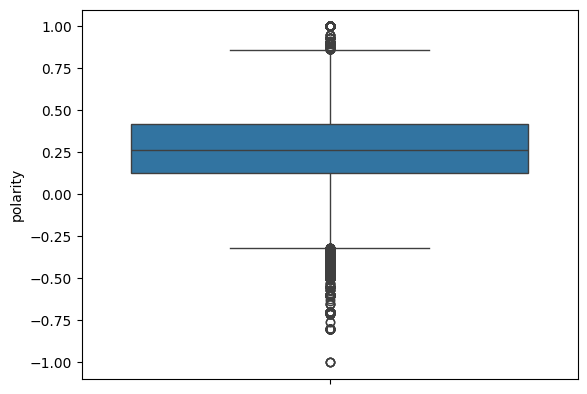

In [ ]:
sns.boxplot(new_['polarity'])

<Axes: ylabel='polarity'>

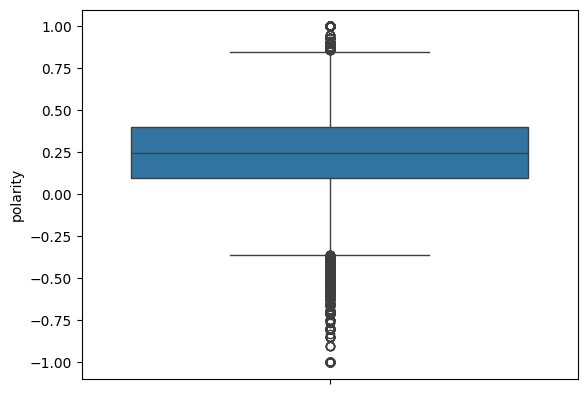

In [ ]:
sns.boxplot(new_df['polarity'])

In [ ]:
# new_df[new_df['Review']==0]

In [ ]:
new_df['text_length'] = new_df['New_Text'].apply(lambda x: len(x.split()))
pos_len = new_df[new_df['Review'] == 1]['text_length']
neg_len = new_df[new_df['Review'] == 0]['text_length']

t_stat, p_val = ttest_ind(pos_len, neg_len)
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_val:.4f}")

T-Statistic: -30.541, P-Value: 0.0000


<ipython-input-82-24312033dd8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['text_length'] = new_df['New_Text'].apply(lambda x: len(x.split()))


In [ ]:
new_['text_length'] = new_['New_Text'].apply(lambda x: len(x.split()))
pos_len = new_[new_['Review'] == 1]['text_length']
neg_len = new_[new_['Review'] == 0]['text_length']

t_stat, p_val = ttest_ind(pos_len, neg_len)
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_val:.4f}")

T-Statistic: -46.583, P-Value: 0.0000


<ipython-input-83-70366e2bb8a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_['text_length'] = new_['New_Text'].apply(lambda x: len(x.split()))


In [ ]:
q1,q3 = new_df['polarity'].quantile([0.25,0.75])
q1,q3

IQR = q3 - q1

min_= q1 - 1.5 * IQR
max_= q3 + 1.5 * IQR

min_, max_

new_df1 = new_df[(new_df['polarity']>=min_)  & (new_df['polarity']<=max_)]

new_df1

,Score,Text,New_Text,Review,polarity,new_review
0,5,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...,1,0.450000,1
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanutsth peanu...,-1,0.083333,1
2,4,This is a confection that has been around a fe...,confect around centuri light pillowi citru gel...,1,0.387500,1
3,2,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...,-1,0.150000,1
4,5,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...,1,0.458333,1
...,...,...,...,...,...,...
199996,1,This was the first kind my family and I bought...,first kind famili bought lucki didnt let stop ...,-1,0.271429,1
199997,1,I have healthy 45 year old teeth and broke a l...,healthi 45 year old teeth broke larg chuck fro...,-1,-0.103125,-1
199998,2,You might as well eat the box it came in. If ...,might well eat box came werent almond would ta...,-1,-0.004167,-1
199999,5,Let me set the scene for you: three felines in...,let set scene three felin hous purebr rescu re...,1,0.177778,1


<Axes: ylabel='Score'>

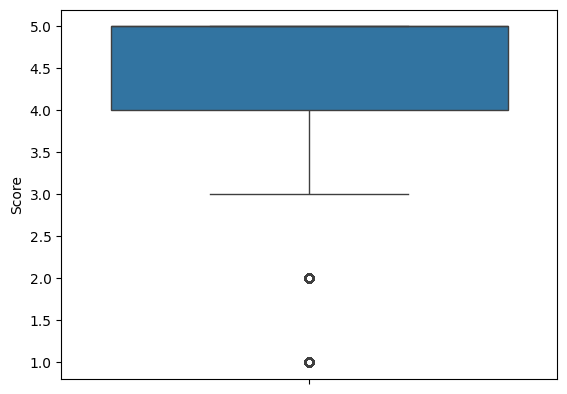

In [ ]:
sns.boxplot(new_df1['Score'])

<Axes: ylabel='polarity'>

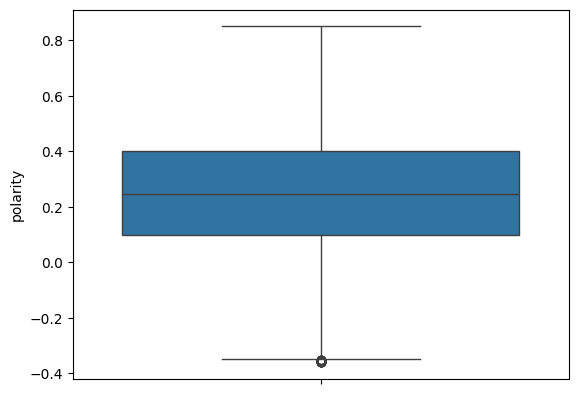

In [ ]:
sns.boxplot(new_df1['polarity'])

In [ ]:
new_df1['Review'].value_counts()

,count
Review,
1,153084
-1,27805
0,15449


In [ ]:
new_df1['new_review'].value_counts()

,count
new_review,
1,167387
-1,18794
0,10157


In [ ]:
new_df1.shape,new_df1.size

((196338, 6), 1178028)

In [ ]:
new_df1['Review'].value_counts()

,count
Review,
1,153084
-1,27805
0,15449


[Text(0, 0, '27805'), Text(0, 0, '15449'), Text(0, 0, '153084')]


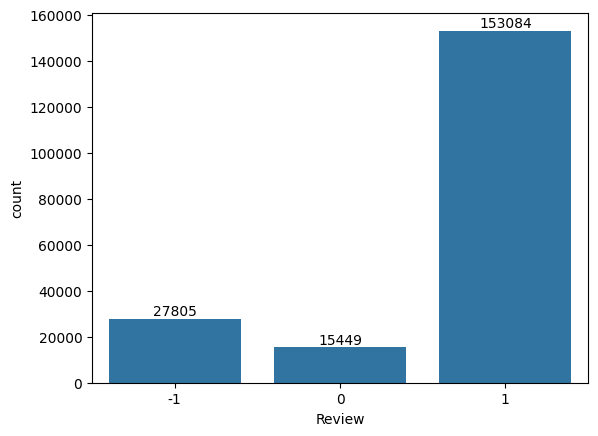

In [ ]:
# sns.countplot(new_df1['Review'])
val = sns.countplot(x=new_df1['Review'])
for i in val.containers:
    print(val.bar_label(i))

In [ ]:
group_a = new_df1[new_df1['Review'] == 1]['polarity']
group_b = new_df1[new_df1['Review'] == 0]['polarity']

# Apply t-test
t_stat, p_value = ttest_ind(group_a, group_b)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference in sentiment.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic: 122.999, P-value: 0.000
Reject the null hypothesis: Significant difference in sentiment.


## Machine learning Libraries for further processing:-

In [ ]:
# For Splitting the dataset
from sklearn.model_selection import train_test_split

#Accuracy measuring library
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score ,precision_score,recall_score ,roc_auc_score

# Vectorization technique TF-IDF or CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# sklearn Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

## Divided the dataset into X and Y -> Text is X independent and y is dependent

In [ ]:
X = new_df1['New_Text']
X.head()

,New_Text
0,bought sever vital can dog food product found ...
1,product arriv label jumbo salt peanutsth peanu...
2,confect around centuri light pillowi citru gel...
3,look secret ingredi robitussin believ found go...
4,great taffi great price wide assort yummi taff...


In [ ]:
new_df1.head()

,Score,Text,New_Text,Review,polarity,new_review
0,5,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...,1,0.450000,1
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanutsth peanu...,-1,0.083333,1
2,4,This is a confection that has been around a fe...,confect around centuri light pillowi citru gel...,1,0.387500,1
3,2,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...,-1,0.150000,1
4,5,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...,1,0.458333,1


In [ ]:
y = new_df1['Review']
y.head()

,Review
0,1
1,-1
2,1
3,-1
4,1


## Split the data into training and testing sets, stratifying by label

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
X_train.shape , y_train.shape

((157070,), (157070,))

In [ ]:
X_test.shape,y_test.shape

((39268,), (39268,))

In [ ]:
new_df1['Review'].value_counts()

,count
Review,
1,153084
-1,27805
0,15449


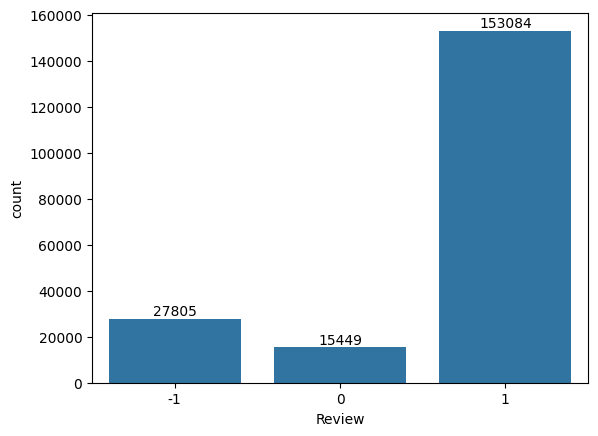

In [ ]:
# sns.countplot(x=new_df1['Review'])

x = sns.countplot(x=new_df1['Review'])
for i in x.containers:
    x.bar_label(i)

In [ ]:
#!pip install imbalanced-learn==0.10.1
# !pip install --upgrade scikit-learn
# !pip install --upgrade imbalanced-learn
#!pip install -U scikit-learn imbalanced-learn pandas numpy matplotlib seaborn xgboost

In [ ]:
import sys
print("Python version:", sys.version)

Python version: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]


In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


In [ ]:
# !pip install --force-reinstall scikit-learn==1.4.2 imbalanced-learn==0.12.0

In [ ]:
# import sklearn
# import imblearn

# print("scikit-learn version:", sklearn.__version__)
# print("imblearn version:", imblearn.__version__)

In [ ]:
# Vectorize the text data
#vectorizer = TfidfVectorizer(max_features=1000)
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english') # ngram_range=(1,2)

In [ ]:
X_train

,New_Text
155011,review make sound realli stupid whatev dont re...
29861,real pain throw whole bagbut disgust open bewa...
98997,two senior dog raw natur food diet mani year h...
31614,vegan travel extens find appropri snack issu o...
131711,made sever pass cook differ time etc result te...
...,...
66841,usual make granola alton brown decent husband ...
38196,buy huge bag costco lime mojito unless parti u...
183282,wait packag soft cooki recreat melt yummi ofbr...
116367,great northern popcorn machin use 8oz popcorn ...


In [ ]:
# X_train_v = vectorizer.fit_transform(X_train)
# X_test_v = vectorizer.transform(X_test)

X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)

In [ ]:
X_train_v.shape,X_test_v.shape

((157070, 10000), (39268, 10000))

In [ ]:
y_train.shape,y_test.shape

((157070,), (39268,))

In [ ]:
# Check shapes before resampling
print("Before resampling:", X_train_v.shape, len(y_train))

Before resampling: (157070, 10000) 157070


# Apply Class Imbalance Handling Techniques --> Sampling ( Over Sampling and undersampling )

# Sampling for Oversampling or Undersampling:-

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

In [ ]:
print(X_train_v.shape)      # Should be (n_samples, n_features)
print(len(y_train))         # Should be n_samples

(157070, 10000)
157070


# Random Under Sampling

In [ ]:
# Apply Random Under Sampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train_v, y_train)

# Count the class distribution after under sampling
print("Class distribution after Random Under Sampling:", y_train_under.value_counts())

Class distribution after Random Under Sampling: Review
-1    12359
 0    12359
 1    12359
Name: count, dtype: int64


# Random Over Sampling

In [ ]:
# Apply Random Over Sampling
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train_v, y_train)

# Count the class distribution after over sampling
print("Class distribution after Random Over Sampling:", y_train_over.value_counts())

Class distribution after Random Over Sampling: Review
-1    122467
 1    122467
 0    122467
Name: count, dtype: int64


# SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
# Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_v, y_train)

print(f'Original dataset shape {y_train.value_counts()}')
print(f'Resampled dataset shape {y_resampled.value_counts()}')

Original dataset shape Review
 1    122467
-1     22244
 0     12359
Name: count, dtype: int64
Resampled dataset shape Review
-1    122467
 1    122467
 0    122467
Name: count, dtype: int64


# Tomek Links removes ambiguous examples from the majority class that are close to the minority class.

In [ ]:
# # Apply Tomek Links
# tomek = TomekLinks()
# X_train_tomek, y_train_tomek = tomek.fit_resample(X_train_v, y_train)

# # Count the class distribution after Tomek Links
# print("Class distribution after Tomek Links:", y_train_tomek.value_counts())


# SMOTE-Tomek

In [ ]:
# # Apply Hybrid Approach (SMOTE + Tomek Links)
# smote_tomek = SMOTETomek(random_state=42)
# X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train_v, y_train)

# # Count the class distribution after SMOTE-Tomek
# print("Class distribution after SMOTE-Tomek:", y_train_smote_tomek.value_counts())

# Model Training and Evaluation with Logistics Regression

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Hyperparametor tuning:-

In [ ]:
# Define model and hyperparameters
model = LogisticRegression(penalty='l2', max_iter=5000)

param_grid = {
    "classifier__C": [0.1, 1, 10],
    "classifier__solver": ["lbfgs", "liblinear"]
}

In [ ]:
# Create imbalanced pipeline
pipeline = ImbPipeline([
    ("resample", smote),
    ("classifier", model)
])

In [ ]:
# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)

In [ ]:
# Fit model
grid_search.fit(X_train_v, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('resample', SMOTE(random_state=42)),
                                       ('classifier',
                                        LogisticRegression(max_iter=5000))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__solver': ['lbfgs', 'liblinear']},
             scoring='f1')

In [ ]:
grid_search.best_params_

{'classifier__C': 10, 'classifier__solver': 'liblinear'}

In [ ]:
# Predict and evaluate
y_pred = grid_search.best_estimator_.predict(X_test_v)
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print(f'accuracy_score:- {accuracy_score(y_test, y_pred)}')
print(f'f1_score:- {f1_score(y_test, y_pred)}')
print(f'precision_score:- {precision_score(y_test, y_pred)}')
print(f'recall_score:- {recall_score(y_test, y_pred)}')
print(f'roc_auc_score:- {roc_auc_score(y_test, y_pred)}')

Best Parameters: {'classifier__C': 10, 'classifier__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.64      0.81      0.71      8651
           1       0.94      0.87      0.90     30617

    accuracy                           0.86     39268
   macro avg       0.79      0.84      0.81     39268
weighted avg       0.88      0.86      0.86     39268

[[ 7010  1641]
 [ 3968 26649]]
accuracy_score:- 0.8571610471630845
f1_score:- 0.9047821141799786
precision_score:- 0.9419936373276776
recall_score:- 0.8703987980533691
roc_auc_score:- 0.840354872382366


In [ ]:
def evaluate_model(X_train, y_train, X_test, y_test):
    # Train Logistic Regression
    model = LogisticRegression(penalty='l2', max_iter=5000,C=10,solver='liblinear')
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    return accuracy_score,precision, recall, f1, roc_auc

In [ ]:
# Evaluate on Random Under Sampling
accuracy_score_under,precision_under, recall_under, f1_under, roc_auc_under = evaluate_model(X_train_under, y_train_under, X_test_v, y_test)

# Evaluate on Random Over Sampling
accuracy_score_over,precision_over, recall_over, f1_over, roc_auc_over = evaluate_model(X_train_over, y_train_over, X_test_v, y_test)

# Evaluate on SMOTE
accuracy_score_smote,precision_smote, recall_smote, f1_smote, roc_auc_smote = evaluate_model(X_resampled, y_resampled, X_test_v, y_test)

# Evaluate on Tomek Links
#accuracy_score_tomek,precision_tomek, recall_tomek, f1_tomek, roc_auc_tomek = evaluate_model(X_train_tomek, y_train_tomek, X_test_v, y_test)

# Evaluate on SMOTE-Tomek
#accuracy_score_smote_tomek,precision_smote_tomek, recall_smote_tomek, f1_smote_tomek, roc_auc_smote_tomek = evaluate_model(X_train_smote_tomek, y_train_smote_tomek, X_test_v, y_test)

# Store results
results = {
    "Method": ["Random Under Sampling", "Random Over Sampling", "SMOTE"],
    "Accuracy": [accuracy_score_under, accuracy_score_over, accuracy_score_smote],
    "Precision": [precision_under, precision_over, precision_smote],
    "Recall": [recall_under, recall_over, recall_smote],
    "F1 Score": [f1_under, f1_over, f1_smote],
    "ROC AUC": [roc_auc_under, roc_auc_over, roc_auc_smote]
}

results_df = pd.DataFrame(results)
print(results_df)

                  Method                                     Accuracy  \
0  Random Under Sampling  <function accuracy_score at 0x7cf35ce6d300>   
1   Random Over Sampling  <function accuracy_score at 0x7cf35ce6d300>   
2                  SMOTE  <function accuracy_score at 0x7cf35ce6d300>   

   Precision    Recall  F1 Score   ROC AUC  
0   0.950643  0.837933  0.890737  0.841981  
1   0.944873  0.863246  0.902217  0.842500  
2   0.941994  0.870399  0.904782  0.840355  


<Axes: xlabel='Method', ylabel='F1 Score'>

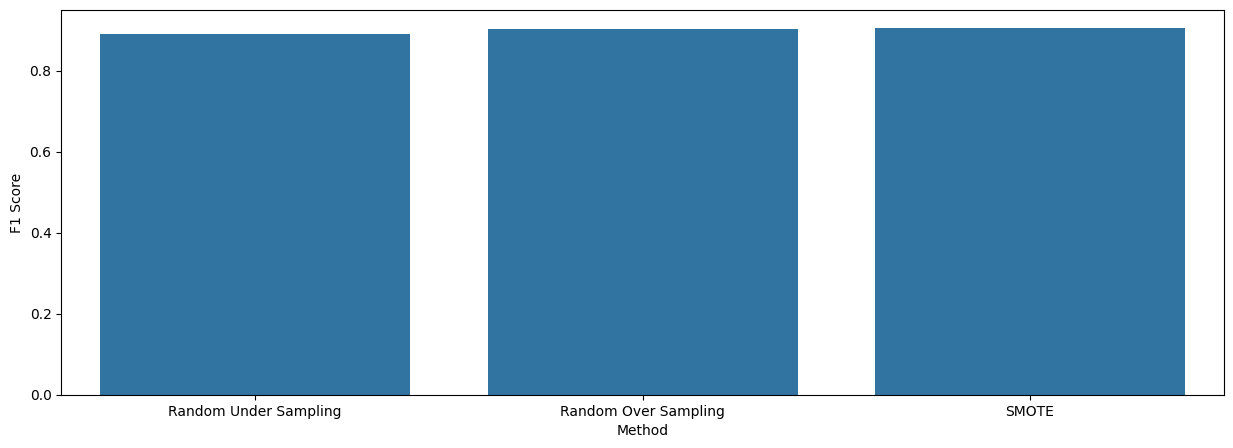

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(y=results_df['F1 Score'], x=results_df['Method'])

# ✅ Hypothesis Testing Use Cases

In [ ]:
new_df1.head()

,Score,Text,New_Text,Review,polarity,text_length
0,5,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...,1,0.450000,23
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanutsth peanu...,0,0.083333,18
2,4,This is a confection that has been around a fe...,confect around centuri light pillowi citru gel...,1,0.387500,40
3,2,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...,0,0.150000,18
4,5,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...,1,0.458333,13


In [ ]:
vec = CountVectorizer()
X = vec.fit_transform(new_df1['New_Text'])
y = new_df1['Review']  # categorical (Negative, Neutral, Positive)

chi2_scores, p_values = chi2(X, y.factorize()[0])

# Top N indicative words
import numpy as np
top_indices = np.argsort(chi2_scores)[-10:]
top_words = [vec.get_feature_names_out()[i] for i in top_indices]
print("Top indicative words:", top_words)

Top indicative words: ['product', 'didnt', 'thought', 'tast', 'love', 'return', 'would', 'bad', 'great', 'disappoint']


In [ ]:
new_df1['new_review']  = new_df1['polarity'].apply(lambda x: 1 if x >0 else 0)

<ipython-input-147-48068f51943e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['new_review']  = new_df1['polarity'].apply(lambda x: 1 if x >0 else 0)


In [ ]:
vec = CountVectorizer()
X = vec.fit_transform(new_df1['New_Text'])
y = new_df1['new_review']  # categorical (Negative, Neutral, Positive)

chi2_scores, p_values = chi2(X, y.factorize()[0])

# Top N indicative words
import numpy as np
top_indices = np.argsort(chi2_scores)[-10:]
top_words = [vec.get_feature_names_out()[i] for i in top_indices]
print("Top indicative words:", top_words)

Top indicative words: ['nice', 'better', 'sweet', 'coffe', 'best', 'bad', 'love', 'chicken', 'great', 'good']


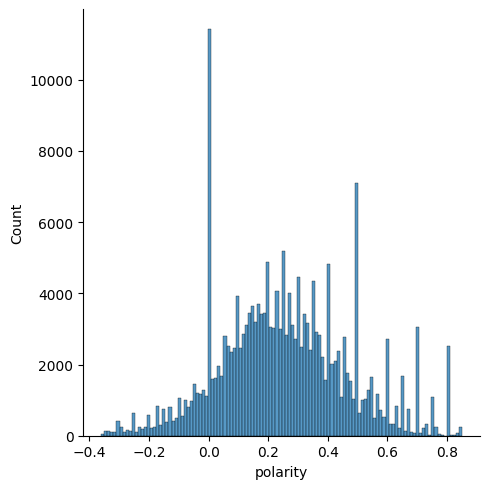

In [ ]:
sns.displot(new_df1['polarity'])

In [ ]:
from scipy.stats import f_oneway

grouped = new_df1.groupby('Review')['new_review'].apply(list)
anova_result = f_oneway(*grouped)
print(f"F-statistic: {anova_result.statistic}, P-value: {anova_result.pvalue}")


F-statistic: 8156.211721297777, P-value: 0.0


In [ ]:
from scipy.stats import f_oneway

grouped = new_df1.groupby('Review')['polarity'].apply(list)
anova_result = f_oneway(*grouped)
print(f"F-statistic: {anova_result.statistic}, P-value: {anova_result.pvalue}")


F-statistic: 15128.8726871894, P-value: 0.0


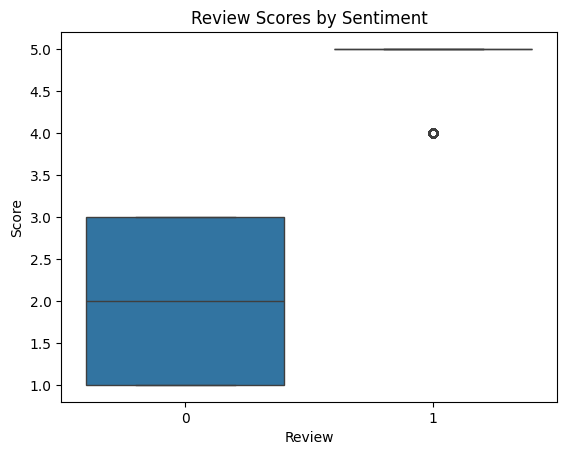

In [ ]:
sns.boxplot(x='Review', y='Score', data=new_df1)
plt.title('Review Scores by Sentiment')
plt.show()

# Deep Learning CNN and LSTM :-

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
new_df1.head()

,Score,Text,New_Text,Review,polarity,new_review
0,5,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...,1,0.450000,1
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanutsth peanu...,-1,0.083333,1
2,4,This is a confection that has been around a fe...,confect around centuri light pillowi citru gel...,1,0.387500,1
3,2,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...,-1,0.150000,1
4,5,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...,1,0.458333,1


In [ ]:
new_df1['latest_review'] = new_df['Review'].apply(lambda x: 1 if x>0 else 0)

<ipython-input-56-949cc9c1665d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['latest_review'] = new_df['Review'].apply(lambda x: 1 if x>0 else 0)


In [ ]:
new_df1['latest_review'].value_counts()

,count
latest_review,
1,153084
0,43254


In [ ]:
def map_sentiment(score):
    if score >= 4:
        return 2  # Positive
    elif score >2:
        return 1  # Neutral
    else:
        return 0  # Negative

new_df1.drop('Review',axis=1,inplace=True)
new_df1['Review'] = new_df1['Score'].apply(map_sentiment)

<ipython-input-92-4412921c0b77>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1.drop('Review',axis=1,inplace=True)
<ipython-input-92-4412921c0b77>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['Review'] = new_df1['Score'].apply(map_sentiment)


In [ ]:
new_df1['Review'].value_counts()

,count
Review,
2,153084
0,27805
1,15449


In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(new_df1['New_Text'])

sequences = tokenizer.texts_to_sequences(new_df1['New_Text'])
padded = pad_sequences(sequences, maxlen=200)

X1 = padded
y1 = new_df1['Review']

X_train1, X_val, y_train1, y_val = train_test_split(X1, y1, test_size=0.2)

In [ ]:
X_train_v.shape,y_train.shape

((157070, 10000), (157070,))

In [ ]:
X_test_v.shape,y_test.shape

((39268, 10000), (39268,))

In [ ]:
X_train1.shape,y_train1.shape

((157070, 200), (157070,))

In [ ]:
X_val.shape,y_val.shape

((39268, 200), (39268,))

In [ ]:
# Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train1, y_train1)

print(f'Original dataset shape {y_train1.value_counts()}')
print(f'Resampled dataset shape {y_resampled.value_counts()}')

Original dataset shape Review
2    122489
0     22207
1     12374
Name: count, dtype: int64
Resampled dataset shape Review
2    122489
0    122489
1    122489
Name: count, dtype: int64


In [ ]:
# from keras.models import Sequential
# from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
# from keras.callbacks import EarlyStopping
# from keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization,Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping , ReduceLROnPlateau

In [ ]:
embedding_dim = 64
vocab_size = 10000
max_length = 200

ann_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
from tensorflow.keras.optimizers import Adam
#ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
ann_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = ann_model.fit(
    X_resampled, y_resampled,
    validation_split=0.2,
    epochs=10,
    batch_size=128,
    callbacks=[EarlyStopping(patience=5), ReduceLROnPlateau()]
)

Epoch 1/10
2296/2296 ━━━━━━━━━━━━━━━━━━━━ 120s 51ms/step - accuracy: 0.4170 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/10
2296/2296 ━━━━━━━━━━━━━━━━━━━━ 112s 38ms/step - accuracy: 0.4157 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/10
2296/2296 ━━━━━━━━━━━━━━━━━━━━ 86s 38ms/step - accuracy: 0.4175 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/10
2296/2296 ━━━━━━━━━━━━━━━━━━━━ 143s 38ms/step - accuracy: 0.4172 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/10
2296/2296 ━━━━━━━━━━━━━━━━━━━━ 88s 38ms/step - accuracy: 0.4177 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/10
2296/2296 ━━━━━━━━━━━━━━━━━━━━ 140s 37ms/step - accuracy: 0.4172 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_r

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

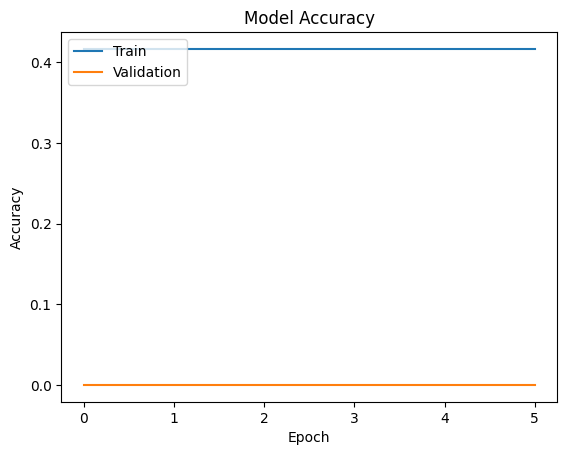

In [ ]:
# Plot for Val Accuracy vs Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

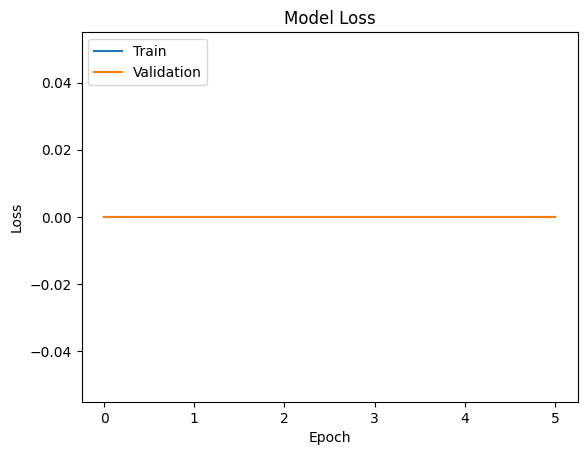

In [ ]:
# Plot for val Loss vs Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
# Predict on test set
y_pred_proba = ann_model.predict(X_val)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = y_val # np.argmax(y_val, axis=1)

  53/1228 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1228/1228 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


In [ ]:
# 5. Evaluation Metrics
print("📊 Classification Report:")
print(classification_report(y_true, y_pred))

print(f"Confusion Matrix:- {confusion_matrix(y_true, y_pred)}")

print(f"Recal Score:- {recall_score(y_true, y_pred,average='weighted')}")

print(f"Precision Score:- {precision_score(y_true, y_pred,average='weighted')}")

print(f"F1 Score:- {f1_score(y_true, y_pred,average='weighted')}")

print(f"Accuracy Score:- {accuracy_score(y_true, y_pred)}")

📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      5483
           0       0.08      1.00      0.15      3122
           1       0.00      0.00      0.00     30663

    accuracy                           0.08     39268
   macro avg       0.03      0.33      0.05     39268
weighted avg       0.01      0.08      0.01     39268

Confusion Matrix:- [[    0  5483     0]
 [    0  3122     0]
 [    0 30663     0]]
Recal Score:- 0.07950494040949374
Precision Score:- 0.0063210355495171506
F1 Score:- 0.011710989571051636
Accuracy Score:- 0.07950494040949374


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
# For training score
train_loss, train_acc = ann_model.evaluate(X_resampled,y_resampled, verbose=0)
print(f"✅ Training Accuracy: {train_acc:.4f}")

# For testing score
test_loss, test_acc = ann_model.evaluate(X_val, y_val, verbose=0)
print(f"🧪 Testing Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


✅ Training Accuracy: 0.3333
🧪 Testing Accuracy: 0.0783


# Build LSTM with Anti-Overfitting & Anti-Underfitting Techniques

In [ ]:
# # Build model
# lstm_model = Sequential([
#     Embedding(input_dim=10000, output_dim=128, input_length=200),
#     Bidirectional(LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),
#     Dropout(0.5),
#     LSTM(32, dropout=0.3, recurrent_dropout=0.3),
#     Dropout(0.5),
#     Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
#     Dropout(0.3),
#     Dense(3, activation='softmax')  # 3 sentiment classes
# ])

In [ ]:
# Run this in your terminal / Colab cell
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2025-04-22 04:43:39--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-22 04:43:39--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-22 04:43:40--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
max_words = 10000
embedding_dim1 = 100
# === 2. Load GloVe embeddings ===
embeddings_index = {}
with open("glove.6B.100d.txt", encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embedding_matrix = np.zeros((max_words, embedding_dim1))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
lstm_model = Sequential([
    Embedding(input_dim=10000, output_dim=128,input_length=200,trainable=False), # weights=[embedding_matrix]

    # First BiLSTM layer
    Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),
    Dropout(0.4),

    # Second BiLSTM layer
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),
    Dropout(0.4),

    # Third unidirectional LSTM
    LSTM(32, dropout=0.3, recurrent_dropout=0.3),
    Dropout(0.4),

    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),

    Dense(3, activation='softmax')
])

In [ ]:
lstm_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    #optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
lstm_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
X_resampled.shape,y_resampled.shape

((367467, 200), (367467,))

In [ ]:
X_val.shape,y_val.shape

In [ ]:
# Train model
history = lstm_model.fit(
    X_resampled, y_resampled,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=10,
    callbacks=[early_stop]
)

In [ ]:
# Plot loss and accuracy
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

In [ ]:
# Predict on test set
y_pred_proba = lstm_model.predict(X_val)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = y_val # np.argmax(y_val, axis=1)

In [ ]:
# 5. Evaluation Metrics
print("📊 Classification Report:")
print(classification_report(y_true, y_pred))

print(f"Confusion Matrix:- {confusion_matrix(y_true, y_pred)}")

print(f"Recal Score:- {recall_score(y_true, y_pred,average='weighted')}")

print(f"Precision Score:- {precision_score(y_true, y_pred,average='weighted')}")

print(f"F1 Score:- {f1_score(y_true, y_pred,average='weighted')}")

print(f"Accuracy Score:- {accuracy_score(y_true, y_pred)}")

In [ ]:
# For training score
train_loss, train_acc = ann_model.evaluate(X_resampled,y_resampled, verbose=0)
print(f"✅ Training Accuracy: {train_acc:.4f}")

# For testing score
test_loss, test_acc = ann_model.evaluate(X_val, y_val, verbose=0)
print(f"🧪 Testing Accuracy: {test_acc:.4f}")

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from imblearn.pipeline import Pipeline

# pipe = Pipeline([
#     ('smote', SMOTE()),
#     ('clf', RandomForestClassifier())
# ])

# pipe.fit(X_train, y_train)

In [ ]:
# with open('vectorizer.pkl', 'wb') as model_file:
#     pickle.dump(vectorizer, model_file)

In [ ]:
# clf = Pipeline([
#     ('TF-IDF Vectorizer:', TfidfVectorizer()),  # First step: TF-IDF Vectorizer
#     ('RandomForestClassifier Classifier:', LogisticRegression())  # Second step: LogisticRegression
# ])

# clf.fit(X_train,y_train)

In [ ]:
# y_pred = clf.predict(X_test)
# y_pred

In [ ]:
# print("Accuracry Score:-",accuracy_score(y_test, y_pred))
# print(classification_report(y_test,y_pred))

In [ ]:
# X_test

In [ ]:
import pickle

In [ ]:
# ✅ Save vectorizer
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

# ✅ Save SMOTE-Tomek resampler
with open('smote_tomek.pkl', 'wb') as file:
    pickle.dump(smote, file)  # Replace with your actual SMOTETomek object

# ✅ Save trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
# with open('pipeline.pkl', 'wb') as model_file:
#     pickle.dump(clf, model_file)

In [ ]:
# with open('pipeline.pkl', 'rb') as model_file:
#     Pipeline = pickle.load(model_file)

In [ ]:
# Pipeline

In [ ]:
# review_vectorized = Pipeline[0].transform(['This is testing review'])

In [ ]:
# prediction = Pipeline[1].predict(review_vectorized)

In [ ]:
# Pipeline[1].predict([])